In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import anndata
import scanpy as sc
from ALLCools.mcds import MCDS
from ALLCools.clustering import tsne, significant_pc_test, filter_regions, remove_black_list_region, lsi, binarize_matrix
from ALLCools.plot import *
import os
import sys
import h5py
import numpy as np
import pandas as pd
from ALLCools.mcds import MCDS
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib import cm as cm
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import pathlib
import logging
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, pairwise_distances
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import normalize
from sklearn.neighbors import kneighbors_graph
from scipy.stats import zscore, ranksums, pearsonr, spearmanr
from scipy.sparse import load_npz, save_npz, csr_matrix
from scipy.cluster.hierarchy import fclusterdata, linkage, fcluster
from statsmodels.sandbox.stats.multicomp import multipletests as FDR
from umap import UMAP
import harmonypy as hm
#import scanorama
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import anndata
import scanpy as sc
import scanpy.external as sce

import xarray as xr
from ALLCools.mcds.utilities import calculate_posterior_mc_frac


In [2]:
genedf = pd.read_csv('GBM_cellxgene_matrix.csv', sep = ',')
genedf = genedf.set_index('cell')
genedf

,AL669831.4,LINC01128,FAM41C,AL669831.6,AL645608.6,AL645608.2,LINC02593,SAMD11,NOC2L,KLHL17,...,CHKB-CPT1B,CHKB,CHKB-DT,MAPK8IP2,ARSA,SHANK3,AC000036.1,ACR,AC002056.2,RABL2B
cell,,,,,,,,,,,,,,,,,,,,,
CCF_3571_Plate1-1-O7-A1,1.146313,1.000000,1.000000,1.000000,1.195327,1.146313,1.000000,1.018037,1.057959,1.000000,...,0.471558,0.271415,1.000000,1.000000,1.000000,0.519954,1.165719,1.018037,1.000000,1.000000
CCF_3571_Plate1-1-O7-A14,1.261787,1.230573,1.000000,1.000000,1.119702,1.248399,0.960434,0.578791,1.264839,1.265776,...,0.273806,0.923978,1.000000,0.728946,0.870146,1.233229,1.261787,1.197817,1.000000,1.228890
CCF_3571_Plate1-1-O7-A2,1.206542,1.247053,0.607363,1.000000,0.485368,1.171409,0.926542,1.083236,1.222490,0.667814,...,0.402367,0.325642,0.333201,0.863739,1.192099,0.919767,1.187343,1.006784,0.607363,0.355103
CCF_3571_Plate1-1-O7-B1,1.157958,1.245412,0.973413,1.194394,0.321908,1.235060,0.744756,0.210657,0.867317,1.000000,...,1.194394,1.106181,0.918244,1.024660,1.221340,1.183644,1.157958,1.215574,1.215574,1.207987
CCF_3571_Plate1-1-O7-B2,0.465457,0.871326,1.239924,1.000000,1.104102,0.973589,1.080809,0.577521,0.849137,1.233870,...,0.400454,0.668338,1.099528,0.961565,0.402196,1.115956,1.139280,1.162265,1.166853,1.256072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WT_180727_Plate4-6-K8-O12,1.000000,1.359957,1.000000,1.000000,1.000000,1.000000,1.000000,0.139070,1.161828,0.662111,...,1.203687,0.564950,0.316397,1.012561,1.012561,1.391811,1.217969,1.000000,1.000000,1.451960
WT_180727_Plate4-6-K8-O23,1.000000,0.451866,1.000000,1.000000,0.548720,0.548720,1.000000,0.987771,0.548720,0.548720,...,1.000000,0.147996,1.000000,1.214007,1.000000,1.233964,1.294922,1.411655,1.337451,0.984860
WT_180727_Plate4-6-K8-O24,1.000000,1.116664,1.000000,1.000000,0.947824,1.000000,1.358692,0.617411,1.305299,1.459042,...,0.371135,0.060637,1.000000,1.297644,1.000000,0.840264,1.000000,1.211052,1.000000,1.000000


In [4]:
meta_mod_genes = pd.read_csv('NIHMS1532254-supplement-9.csv')
meta_mod_genes

,MES2,MES1,AC,OPC,NPC1,NPC2,G1/S,G2/M
0,HILPDA,CHI3L1,CST3,BCAN,DLL3,STMN2,RRM2,CCNB1
1,ADM,ANXA2,S100B,PLP1,DLL1,CD24,PCNA,CDC20
2,DDIT3,ANXA1,SLC1A3,GPR17,SOX4,RND3,KIAA0101,CCNB2
3,NDRG1,CD44,HEPN1,FIBIN,TUBB3,HMP19,HIST1H4C,PLK1
4,HERPUD1,VIM,HOPX,LHFPL3,HES6,TUBB3,MLF1IP,CCNA2
...,...,...,...,...,...,...,...,...
132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
glist = []
for col in meta_mod_genes.columns:
    temp = pd.DataFrame( meta_mod_genes[col].dropna().values,columns = ['genes'])
    temp['type'] = [col] * len(temp)
    glist.append(temp)
meta_mod = pd.concat(glist).reset_index(drop = True)

temp = [k in genedf.columns for k in meta_mod.genes.values]
idx = np.where(np.array(temp) == True)


filtered_meta_mod = meta_mod.iloc[idx]

In [6]:
'''
calculate average expression of control gene set for each cell, 
return a dataframe with index as cell and column as avg expression of that gene set
'''
def get_ctrl_gene_set(genedf, signature,signature_name):
    ctrl_dict = {}
    for cell in genedf.index.values:
        sorted_gene_list = genedf.loc[[cell]].squeeze().sort_values()
        gene_dict = {}
        for i in range(30):
            gene_dict[str(i)] = sorted_gene_list[int(i*len(sorted_gene_list)/30) : int((i+1)*len(sorted_gene_list)/30)]
        avg_ctrl_gene_expr = {}
        for key in gene_dict.keys():
            avg_ctrl_gene_expr[key] = sum(random.sample(gene_dict[key].to_list(), 100))/100
        gene2bin = {}
        for b, geneseries in gene_dict.items():
            for g in geneseries.index:
                gene2bin[g] = b
        ctrl_bin4gene =  [gene2bin[g] for g in signature]
        avg_control = sum([avg_ctrl_gene_expr[b] for b in ctrl_bin4gene])/len(signature)
        ctrl_dict[cell] = avg_control
    return pd.DataFrame.from_dict(ctrl_dict, orient = 'index', columns = [signature_name])


In [20]:
signature = filtered_meta_mod[filtered_meta_mod['type'] == 'MES2'].genes.values
#ctrl_gene_set = get_ctrl_gene_set(genedf, signature,'MES2')
#ctrl_gene_set

In [9]:
genedf.loc[['CCF_3571_Plate1-1-O7-A1']].squeeze().sort_values()
gene_dict = {}
for i in range(30):
    gene_dict[str(i)] = sorted_gene_list[int(i*len(sorted_gene_list)/30) : int((i+1)*len(sorted_gene_list)/30)]
gene_dict
avg_ctrl_gene_expr = {}
for key in gene_dict.keys():
    avg_ctrl_gene_expr[key] = sum(random.sample(gene_dict[key].to_list(), 100))/100
avg_ctrl_gene_expr
gene2bin = {}
for b, geneseries in gene_dict.items():
    for g in geneseries.index:
        gene2bin[g] = b
ctrl_bin4gene =  [gene2bin[g] for g in signature]
avg_control = sum([avg_ctrl_gene_expr[b] for b in ctrl_bin4gene])/len(signature)
avg_control

NameError: name 'random' is not defined

In [16]:
# creat control set 
# 1. avg gene expression across cells
# 2. order gene by expression level
sorted_gene_list = genedf.mean(axis = 0).sort_values()
sorted_gene_list

ONECUT3       0.345982
FOXG1         0.368519
HOXB7         0.374157
PTMA          0.380723
AC092171.1    0.382557
                ...   
CTDP1         1.249785
ATP9B         1.253921
AC015923.1    1.255371
EXOC4         1.256912
CEP72         1.262703
Length: 31204, dtype: float64

In [17]:
# 3. create 30 bins (equal number of genes) a dictionary with 
#    key as bin and values as gene expression
gene_dict = {}
for i in range(30):
    gene_dict[str(i)] = sorted_gene_list[int(i*len(sorted_gene_list)/30) : int((i+1)*len(sorted_gene_list)/30)]
gene_dict['0'].index

Index(['ONECUT3', 'FOXG1', 'HOXB7', 'PTMA', 'AC092171.1', 'IER2', 'SOX4',
       'ZFP36L1', 'VGF', 'KISS1R',
       ...
       'LINC01686', 'AC005332.4', 'MBNL1-AS1', 'AP000708.1', 'AL357033.1',
       'AC079411.1', 'PLEKHO1', 'AC092053.2', 'AC008403.3', 'PROB1'],
      dtype='object', length=1040)

In [18]:
 # 4. randomly select 100 gene from each bin,
    # generate dictionary with key as bin and value as list of genes
import random
ctrl_100gene_4bin = {}
for key in gene_dict.keys():
    ctrl_100gene_4bin[key] = random.sample(gene_dict[key].index.to_list(), 100)
ctrl_100gene_4bin

{'0': ['TMEM121',
  'CENPX',
  'RHOF',
  'ZEB2-AS1',
  'LINC01635',
  'SPRY1',
  'SLC30A3',
  'MARCKS',
  'C1orf61',
  'IFNGR2',
  'AP000802.1',
  'AC004080.5',
  'FKBP2',
  'LHX6',
  'AC074143.2',
  'AL117332.1',
  'SHISA3',
  'AC099654.1',
  'AC008743.1',
  'FEZF1',
  'AC008622.2',
  'INS-IGF2',
  'FAM84B',
  'PPP1R15B',
  'OAZ1',
  'FZD8',
  'MSX1',
  'CIRBP',
  'ASCL1',
  'AC019129.2',
  'HOTTIP',
  'WBP2',
  'AC008894.3',
  'PIM3',
  'AC009053.2',
  'AL135905.2',
  'TCHH',
  'HMGN2',
  'LINC01415',
  'ATP6V0E2',
  'AL160408.2',
  'MYC',
  'FRAT2',
  'NAGS',
  'AL137003.1',
  'ZBTB14',
  'ISL1',
  'MIF4GD',
  'HOXC4',
  'AL391335.1',
  'AC092171.1',
  'GACAT2',
  'ODF3B',
  'AC026774.1',
  'LINC02202',
  'TNFRSF12A',
  'AC022509.3',
  'AC092849.2',
  'PROB1',
  'AC079411.1',
  'MCL1',
  'DLX2',
  'AF254983.1',
  'HOOK2',
  'PURA',
  'CCND2-AS1',
  'CALY',
  'C3orf80',
  'RBM8A',
  'IMP3',
  'AC024405.2',
  'HNRNPU',
  'C9orf163',
  'HNRNPD',
  'RNASEK-C17orf49',
  'CENPT',
  'AC079

In [19]:
gene2bin = {}
for b, geneseries in gene_dict.items():
    for g in geneseries.index:
        gene2bin[g] = b
gene2bin

{'ONECUT3': '0',
 'FOXG1': '0',
 'HOXB7': '0',
 'PTMA': '0',
 'AC092171.1': '0',
 'IER2': '0',
 'SOX4': '0',
 'ZFP36L1': '0',
 'VGF': '0',
 'KISS1R': '0',
 'ID2': '0',
 'ZIC2': '0',
 'MEF2C-AS2': '0',
 'EFNA3': '0',
 'AC129492.4': '0',
 'GATA2': '0',
 'SOX11': '0',
 'ZFP36L2': '0',
 'HES7': '0',
 'MALAT1': '0',
 'LINC00324': '0',
 'AC012531.3': '0',
 'IRX4': '0',
 'TUBB2B': '0',
 'AL121722.1': '0',
 'JUN': '0',
 'AC005837.2': '0',
 'IRF2BP2': '0',
 'MIDN': '0',
 'AC092171.3': '0',
 'TFAP2A-AS1': '0',
 'C1orf61': '0',
 'LINC01089': '0',
 'AC104695.2': '0',
 'WNT1': '0',
 'NEUROD2': '0',
 'FENDRR': '0',
 'SPRY1': '0',
 'ICAM5': '0',
 'HSPA8': '0',
 'OLIG2': '0',
 'DM1-AS': '0',
 'AC090136.3': '0',
 'MIRLET7BHG': '0',
 'NR2F2': '0',
 'MYC': '0',
 'CBX8': '0',
 'UNCX': '0',
 'HOXB3': '0',
 'POU3F3': '0',
 'HOXC6': '0',
 'ZCCHC3': '0',
 'HOXB-AS3': '0',
 'IER5L': '0',
 'ZACN': '0',
 'SOX12': '0',
 'SP8': '0',
 'CAMK2N1': '0',
 'TOB1': '0',
 'CDKN1B': '0',
 'FEV': '0',
 'LINC00608': '0',
 'S

In [20]:
#genedf.index.values
genedf.loc[['CCF_3571_Plate1-1-O7-A1']]
bin4genes = [ gene2bin[g] for g in signature]
temp = [current_cell_expr[ctrl_100gene_4bin[b]].sum(axis = 1)/100 for b in bin4genes]
        # average the expression of these 100x gene list within the cell
ctrl_score = sum(temp)/len(temp)

NameError: name 'current_cell_expr' is not defined

In [48]:
ctrl_score.values[0]

0.9336669094131249

In [10]:
def get_ctrl_gene_score(genedf, signature, signature_name,ctrl_100gene_4bin):
    ctrl_dict = {}
    for cell in genedf.index.values:
        current_cell_expr = genedf.loc[[cell]]
        # for each gene in signature, get respective bin
        bin4genes = [ gene2bin[g] for g in signature]
        # for each gene in signature, get 100 genes for each bin, make a list
        temp = [current_cell_expr[ctrl_100gene_4bin[b]].sum(axis = 1)/100 for b in bin4genes]
        # average the expression of these 100x gene list within the cell
        ctrl_score = sum(temp)/len(temp)
        ctrl_dict[cell] = ctrl_score.values[0]
    return pd.DataFrame.from_dict(ctrl_dict, orient = 'index', columns = [signature_name])


In [25]:
current_cell_expr = genedf.iloc[[0]]
bin4genes = [ gene2bin[g] for g in signature]
temp = [current_cell_expr[ctrl_100gene_4bin[b]].sum(axis = 1)/100 for b in bin4genes]
ctrl_score = sum(temp)/len(temp)
ctrl_score

0    0.933667
dtype: float64

In [11]:
# calculate gene signature score: 
# score = avg(gene_expression)cell - avg(ctrl_gene_expression)
def calculate_gene_signature_score(signature,signature_name, gene2bin, ctrl_gene_set, genedf):
    #avg(gene_expression in signature)cell - avg(ctrl_gene_expression in control set)
    df = pd.DataFrame()
    #ctrl_bin4gene =  [gene2bin[g] for g in signature]
   # avg_control = sum([avg_ctrl_gene_expr[b] for b in ctrl_bin4gene])/len(signature)
    df[signature_name] = pd.DataFrame(genedf[signature].sum(axis = 1)/len(signature), columns =[signature_name] ).subtract(ctrl_gene_set)
    return df

#ctrl_gene_set = get_ctrl_gene_score(genedf, signature, 'MES2',ctrl_100gene_4bin)
#df = calculate_gene_signature_score(signature,'MES2', gene2bin, ctrl_gene_set, genedf)
#df


In [55]:
tempdf = genedf.iloc[:100,]

In [56]:
ctrl_gene_set = get_ctrl_gene_score(genedf, signature, 'MES2',ctrl_100gene_4bin)
ctrl_gene_set

,MES2
CCF_3571_Plate1-1-O7-A1,0.933667
CCF_3571_Plate1-1-O7-A14,0.890481
CCF_3571_Plate1-1-O7-A2,0.858548
CCF_3571_Plate1-1-O7-B1,0.881592
CCF_3571_Plate1-1-O7-B2,0.831633
...,...
CCF_3571_Plate1-3-N8-E18,0.888036
CCF_3571_Plate1-3-N8-E5,0.868609
CCF_3571_Plate1-3-N8-E6,0.852144
CCF_3571_Plate1-3-N8-F17,0.882544


In [21]:
df_list = []
for col in meta_mod_genes.columns:
    signature= filtered_meta_mod[filtered_meta_mod['type'] == col].genes.values
    ctrl_gene_set = get_ctrl_gene_score(genedf, signature, col,ctrl_100gene_4bin)
    df = calculate_gene_signature_score(signature,col, gene2bin, ctrl_gene_set, genedf)
    df_list.append(df)
    print(f'finished {col} calculation')
signature_score_df = pd.concat(df_list, axis = 1)
signature_score_df

finished MES2 calculation
finished MES1 calculation
finished AC calculation
finished OPC calculation
finished NPC1 calculation
finished NPC2 calculation
finished G1/S calculation
finished G2/M calculation


,MES2,MES1,AC,OPC,NPC1,NPC2,G1/S,G2/M
cell,,,,,,,,
CCF_3571_Plate1-1-O7-A1,0.024878,0.024778,-0.048358,-0.015239,-0.007992,0.047492,0.009758,-0.011504
CCF_3571_Plate1-1-O7-A14,-0.106481,-0.061462,0.085318,-0.015542,-0.092149,-0.134705,-0.025935,0.006295
CCF_3571_Plate1-1-O7-A2,0.001617,-0.037352,-0.011019,-0.000396,-0.095250,-0.119517,-0.098369,-0.133626
CCF_3571_Plate1-1-O7-B1,-0.011331,-0.061866,0.025909,-0.075033,-0.130428,-0.067201,0.057854,-0.063551
CCF_3571_Plate1-1-O7-B2,-0.098213,0.043901,-0.017297,-0.024662,-0.074035,-0.030528,-0.158290,-0.128970
...,...,...,...,...,...,...,...,...
WT_180727_Plate4-6-K8-O12,-0.057487,0.052792,0.021325,-0.006865,-0.019037,-0.078737,-0.063018,0.016974
WT_180727_Plate4-6-K8-O23,0.027743,-0.031664,0.048908,-0.031680,-0.006277,-0.015559,0.006079,-0.058996
WT_180727_Plate4-6-K8-O24,-0.084392,-0.081098,-0.019936,0.022666,-0.060241,0.047521,0.012910,0.052490


In [22]:
signature_score_df.to_csv('signature_score_df.csv')

<AxesSubplot:xlabel='MES1', ylabel='NPC1'>

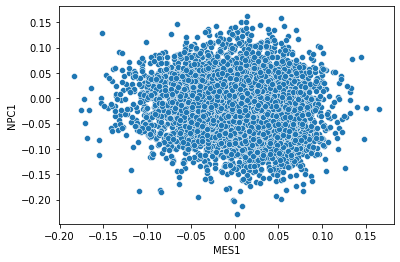

In [62]:
sns.scatterplot(data=signature_score_df, x="MES1", y="NPC1")

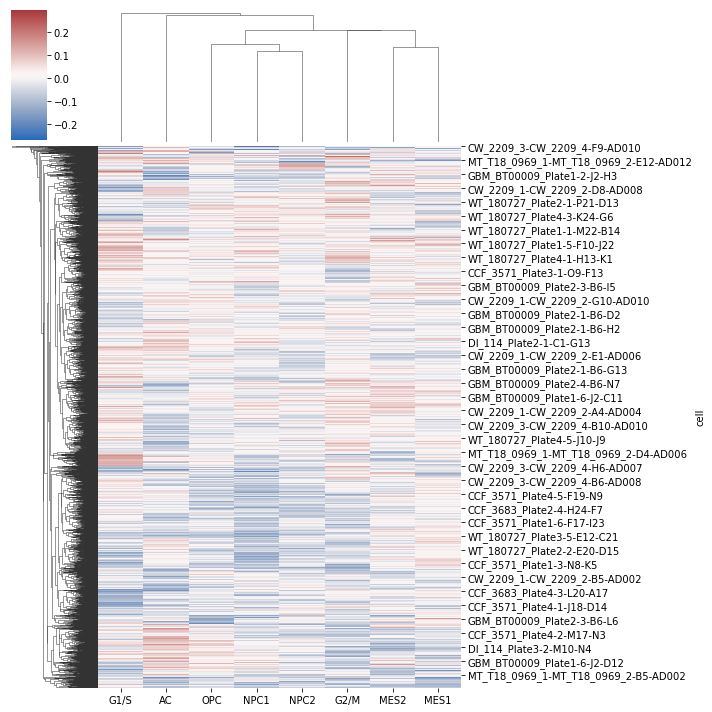

In [64]:
g = sns.clustermap(signature_score_df, cmap="vlag", col_cluster = True )

NameError: name 'signature_score_df' is not defined